In [2]:
# 도미의 길이, 도미의 특성성

bream_length= [25.4,26.3,26.5,29.0,29.0,29.7,29,7,30.0,30.0,30.7,
            31.0,31.0,31.5,32.0,32.0,33.0,33.0,33.5,33.5,34.0,34.0,34.5,
            35.0,35.0,35.0,35.0,36.0,36.0,36.0,37.0,38.5,39.0,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]

# 빙어 데이터

smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,13.4,
                12.2,19.7,19.9]

In [3]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

fish_length = np.array(fish_length)
fish_weight = np.array(fish_weight)

# test_size를 정하지 않을때 기본 분할 비율 75:25
train_input, test_input, train_target, test_target = train_test_split(fish_length,fish_weight,random_state=42)

# reshape(-1,1): 행의 수는 자동으로 계산, 열은 1개로 고정해서 열벡터로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

# 정확도
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))


# 절대 오차 평균
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
print(mae)


0.9538724563190637
0.9572069767030524
38.1


사이킷런으로 선형회귀 모델 만들기

In [8]:
print(knr.predict([[50]]))

[934.]


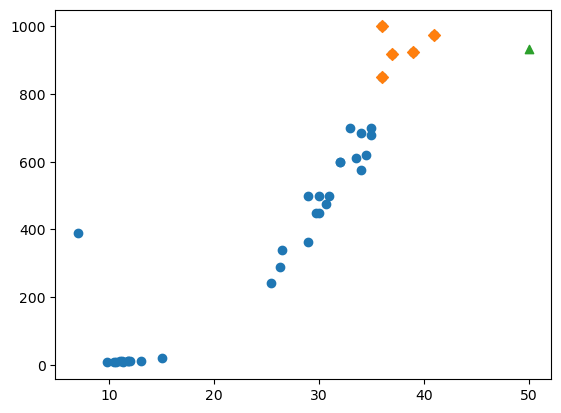

In [11]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50,934,marker='^')
plt.show()

# 선형회귀

[1109.82688846]
[28.12578268] -296.46224551901133


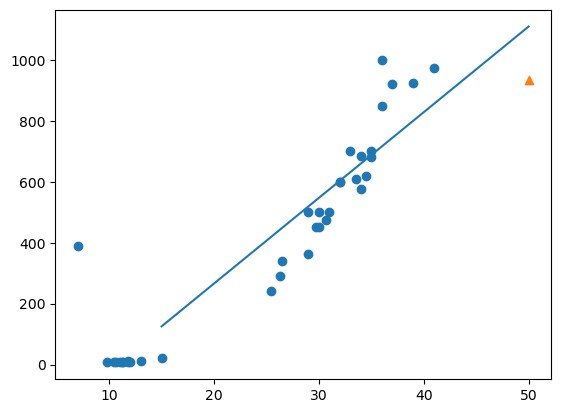

0.8501677471283975
0.9034438063746552


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)

print(lr.predict([[50]]))

print(lr.coef_,lr.intercept_)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input,train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50,934,marker="^")
plt.show()

print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))



# 다항 회귀

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input** 2 , test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

# coef: 계수 구하기
# intercept : 절편 구하기
print(lr.coef_, lr.intercept_)

# 무게 : (1.34 x 길이^2) - (33.7 x 길이) + ( 256.2 )

[1935.37236758]
[  1.34604818 -33.72095371] 256.29959972927537


학습한 직선 그리기

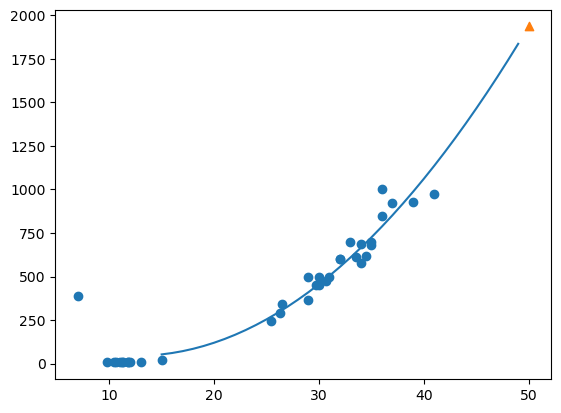

0.9363236093906152
0.9348694595374054


In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듬
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프를 그리기
plt.plot(point, 1.346*point**2 - 33.72*point + 256)

# 50cm 농어 데이터
plt.scatter([50], [1935], marker='^')
plt.show()

# R-squared는 회귀에서만 사용
# R-squared(결졍계수) : 모델의 설명력을 나타내는 지표
# 1에 가까울수록 모델이 데이터를 잘 설명하고 0에 가까울수록 부족한것
# score를 쓰면 자동으로 R-squared로 계산
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))